# First Data Science Project
## Melbourne Housing Prices Prediction
Here, we will go through a data challenge using data predicting housing prices in Melbourne, Australia. 

The data is from Kaggle and can be found [here](https://www.kaggle.com/anthonypino/melbourne-housing-market)

In [1]:
import numpy as np
import pandas as pd

## 1. Collection

In [3]:
full_data = pd.read_csv("./data/Melbourne_housing_FULL.csv")

In [8]:
full_data.describe()

,Rooms,Price,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Lattitude,Longtitude,Propertycount
count,34857.000000,2.724700e+04,34856.000000,34856.000000,26640.000000,26631.000000,26129.000000,23047.000000,13742.00000,15551.000000,26881.000000,26881.000000,34854.000000
mean,3.031012,1.050173e+06,11.184929,3116.062859,3.084647,1.624798,1.728845,593.598993,160.25640,1965.289885,-37.810634,145.001851,7572.888306
std,0.969933,6.414671e+05,6.788892,109.023903,0.980690,0.724212,1.010771,3398.841946,401.26706,37.328178,0.090279,0.120169,4428.090313
min,1.000000,8.500000e+04,0.000000,3000.000000,0.000000,0.000000,0.000000,0.000000,0.00000,1196.000000,-38.190430,144.423790,83.000000
25%,2.000000,6.350000e+05,6.400000,3051.000000,2.000000,1.000000,1.000000,224.000000,102.00000,1940.000000,-37.862950,144.933500,4385.000000
50%,3.000000,8.700000e+05,10.300000,3103.000000,3.000000,2.000000,2.000000,521.000000,136.00000,1970.000000,-37.807600,145.007800,6763.000000
75%,4.000000,1.295000e+06,14.000000,3156.000000,4.000000,2.000000,2.000000,670.000000,188.00000,2000.000000,-37.754100,145.071900,10412.000000
max,16.000000,1.120000e+07,48.100000,3978.000000,30.000000,12.000000,26.000000,433014.000000,44515.00000,2106.000000,-37.390200,145.526350,21650.000000


In [12]:
list(full_data.columns)

['Suburb',
 'Address',
 'Rooms',
 'Type',
 'Price',
 'Method',
 'SellerG',
 'Date',
 'Distance',
 'Postcode',
 'Bedroom2',
 'Bathroom',
 'Car',
 'Landsize',
 'BuildingArea',
 'YearBuilt',
 'CouncilArea',
 'Lattitude',
 'Longtitude',
 'Regionname',
 'Propertycount']

In [16]:
full_data.loc[:,'Suburb':'Car']

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,Bedroom2,Bathroom,Car
0,Abbotsford,68 Studley St,2,h,NaN,SS,Jellis,3/09/2016,2.5,3067.0,2.0,1.0,1.0
1,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,2.0,1.0,1.0
2,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,2.0,1.0,0.0
3,Abbotsford,18/659 Victoria St,3,u,NaN,VB,Rounds,4/02/2016,2.5,3067.0,3.0,2.0,1.0
4,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,3.0,2.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
34852,Yarraville,13 Burns St,4,h,1480000.0,PI,Jas,24/02/2018,6.3,3013.0,4.0,1.0,3.0
34853,Yarraville,29A Murray St,2,h,888000.0,SP,Sweeney,24/02/2018,6.3,3013.0,2.0,2.0,1.0
34854,Yarraville,147A Severn St,2,t,705000.0,S,Jas,24/02/2018,6.3,3013.0,2.0,1.0,2.0
34855,Yarraville,12/37 Stephen St,3,h,1140000.0,SP,hockingstuart,24/02/2018,6.3,3013.0,NaN,NaN,NaN


In [17]:
full_data.loc[:,'Landsize':'Propertycount']

,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,126.0,NaN,NaN,Yarra City Council,-37.80140,144.99580,Northern Metropolitan,4019.0
1,202.0,NaN,NaN,Yarra City Council,-37.79960,144.99840,Northern Metropolitan,4019.0
2,156.0,79.0,1900.0,Yarra City Council,-37.80790,144.99340,Northern Metropolitan,4019.0
3,0.0,NaN,NaN,Yarra City Council,-37.81140,145.01160,Northern Metropolitan,4019.0
4,134.0,150.0,1900.0,Yarra City Council,-37.80930,144.99440,Northern Metropolitan,4019.0
...,...,...,...,...,...,...,...,...
34852,593.0,NaN,NaN,Maribyrnong City Council,-37.81053,144.88467,Western Metropolitan,6543.0
34853,98.0,104.0,2018.0,Maribyrnong City Council,-37.81551,144.88826,Western Metropolitan,6543.0
34854,220.0,120.0,2000.0,Maribyrnong City Council,-37.82286,144.87856,Western Metropolitan,6543.0
34855,NaN,NaN,NaN,Maribyrnong City Council,NaN,NaN,Western Metropolitan,6543.0


In [94]:
interesting_columns = [
    #'Suburb',
    #'Address',
    'Rooms',
    #'Type',
    'Price',
    #'Method',
    #'SellerG',
    #'Date',
    #'Distance',
    #'Postcode',
    'Bedroom2',
    'Bathroom',
    'Car',
    'Landsize',
    'BuildingArea',
    'YearBuilt',
    #'CouncilArea',
    'Lattitude',
    'Longtitude',
    #'Regionname',
    'Propertycount',
]

numeric_columns_all = [
    'Rooms',
    'Price',
    'Distance',
    #'Postcode',
    'Bedroom2',
    'Bathroom',
    'Car',
    'Landsize',
    'BuildingArea',
    'YearBuilt',
    'Lattitude',
    'Longtitude',
    'Propertycount'
]

# list(full_data.describe().columns)

numeric_columns = [col for col in numeric_columns_all if col in interesting_columns]
numeric_columns

['Rooms',
 'Price',
 'Bedroom2',
 'Bathroom',
 'Car',
 'Landsize',
 'BuildingArea',
 'YearBuilt',
 'Lattitude',
 'Longtitude',
 'Propertycount']

## 2. Cleaning

In [99]:
# make copy of original data
clean_data = full_data.copy()

# reducing columns
clean_data = clean_data.loc[:, interesting_columns]

# remove duplicates
clean_data = clean_data[~clean_data.duplicated()]

# NaN-Values
clean_data = clean_data.dropna()

In [100]:
clean_data

,Rooms,Price,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Lattitude,Longtitude,Propertycount
2,2,1035000.0,2.0,1.0,0.0,156.0,79.0,1900.0,-37.80790,144.99340,4019.0
4,3,1465000.0,3.0,2.0,0.0,134.0,150.0,1900.0,-37.80930,144.99440,4019.0
6,4,1600000.0,3.0,1.0,2.0,120.0,142.0,2014.0,-37.80720,144.99410,4019.0
11,3,1876000.0,4.0,2.0,0.0,245.0,210.0,1910.0,-37.80240,144.99930,4019.0
14,2,1636000.0,2.0,1.0,2.0,256.0,107.0,1890.0,-37.80600,144.99540,4019.0
...,...,...,...,...,...,...,...,...,...,...,...
34847,3,500000.0,3.0,2.0,2.0,383.0,118.0,2016.0,-37.61940,145.03951,2940.0
34849,3,570000.0,3.0,2.0,2.0,404.0,158.0,2012.0,-37.61031,145.03393,2940.0
34853,2,888000.0,2.0,2.0,1.0,98.0,104.0,2018.0,-37.81551,144.88826,6543.0
34854,2,705000.0,2.0,1.0,2.0,220.0,120.0,2000.0,-37.82286,144.87856,6543.0


In [101]:
clean_data.describe()

,Rooms,Price,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Lattitude,Longtitude,Propertycount
count,8872.000000,8.872000e+03,8872.000000,8872.000000,8872.000000,8872.000000,8872.000000,8872.000000,8872.000000,8872.000000,8872.000000
mean,3.099527,1.093245e+06,3.078787,1.646528,1.692403,523.476330,149.348774,1965.761722,-37.804491,144.991384,7471.880523
std,0.963727,6.796842e+05,0.966228,0.721938,0.975611,1061.962108,87.962948,37.046675,0.090498,0.118985,4371.278496
min,1.000000,1.310000e+05,0.000000,1.000000,0.000000,0.000000,0.000000,1196.000000,-38.174360,144.423790,249.000000
25%,2.000000,6.410000e+05,2.000000,1.000000,1.000000,212.000000,100.000000,1945.000000,-37.858762,144.919995,4380.000000
50%,3.000000,9.000000e+05,3.000000,2.000000,2.000000,478.000000,132.000000,1970.000000,-37.798700,144.998500,6567.000000
75%,4.000000,1.346250e+06,4.000000,2.000000,2.000000,652.000000,180.000000,2000.000000,-37.748992,145.064625,10331.000000
max,12.000000,9.000000e+06,12.000000,9.000000,10.000000,42800.000000,3112.000000,2019.000000,-37.407200,145.526350,21650.000000


## 3. Exploratory Analysis

In [89]:
import plotly.express as px

In [121]:
numeric_data = clean_data.loc[:, numeric_columns]
std_data = (numeric_data - numeric_data.mean())/numeric_data.std()

In [122]:
cov = std_data.cov()
cov

,Rooms,Price,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Lattitude,Longtitude,Propertycount
Rooms,1.000000,0.474808,0.964401,0.623965,0.401118,0.101100,0.606607,0.007020,0.019178,0.083306,-0.081581
Price,0.474808,1.000000,0.460601,0.463340,0.209219,0.058235,0.507000,-0.313811,-0.224327,0.212485,-0.058788
Bedroom2,0.964401,0.460601,1.000000,0.626384,0.405270,0.100975,0.595154,0.016415,0.023176,0.082958,-0.080195
Bathroom,0.623965,0.463340,0.626384,1.000000,0.310714,0.075854,0.553695,0.193299,-0.041498,0.109499,-0.057706
Car,0.401118,0.209219,0.405270,0.310714,1.000000,0.123416,0.317245,0.138921,0.015201,0.035741,-0.030845
Landsize,0.101100,0.058235,0.100975,0.075854,0.123416,1.000000,0.082926,0.037626,0.043506,-0.008486,-0.032241
BuildingArea,0.606607,0.507000,0.595154,0.553695,0.317245,0.082926,1.000000,0.060013,-0.034021,0.097702,-0.058119
YearBuilt,0.007020,-0.313811,0.016415,0.193299,0.138921,0.037626,0.060013,1.000000,0.100223,-0.027075,0.016952
Lattitude,0.019178,-0.224327,0.023176,-0.041498,0.015201,0.043506,-0.034021,0.100223,1.000000,-0.345500,0.029020
Longtitude,0.083306,0.212485,0.082958,0.109499,0.035741,-0.008486,0.097702,-0.027075,-0.345500,1.000000,0.026324


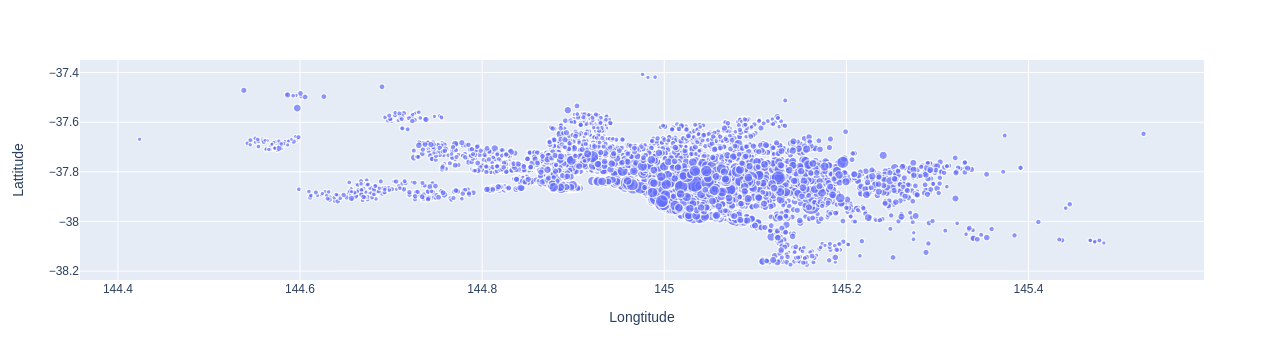

In [124]:
px.scatter(
    data_frame=clean_data,
    x="Longtitude",
    y="Lattitude",
    size="Price",
)

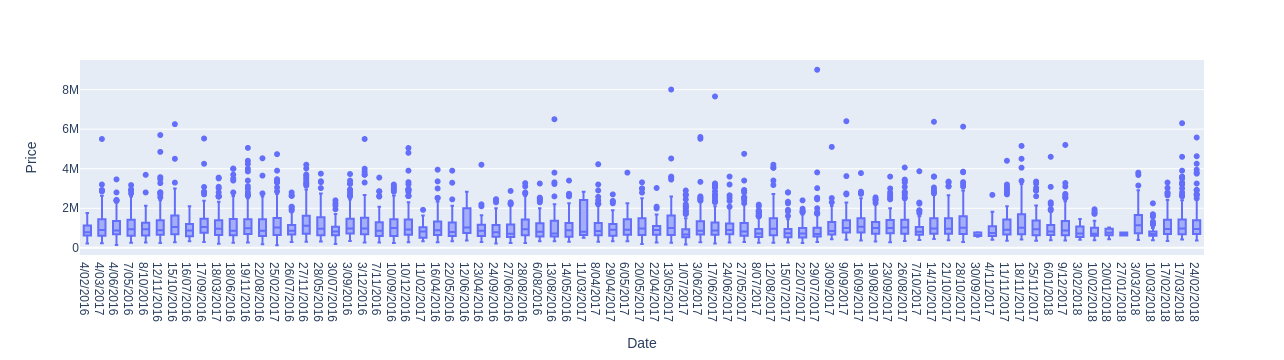

In [93]:
px.box(
    data_frame=clean_data,
    x="Date",
    y="Price"
)

## 4. Model Building

In [87]:
from sklearn.metrics import mean_squared_error
from math import sqrt

### Split Training-Data

In [164]:
training_data = clean_data.sample(frac=0.8)
test_data = clean_data.drop(training_data.index)

test_input = test_data.drop("Price", axis=1)
test_price = test_data["Price"]

training_input = training_data.drop("Price", axis=1)
training_price = training_data["Price"]

### Error Calculator

In [144]:
# defining evaluation metric
def compute_rmse(actual, prediction):
    """
    Computs RMSE (root mean squared error) between predictions from a model
    and the actual values of the target variable.
    """
    
    rmse = sqrt(mean_squared_error(actual, prediction))
    
    # rounding to 2 decimal places
    print('RMSE is ', round(rmse,2))
    
    return rmse

### Lazy Estimator

In [170]:
def lazy_estimator(x_train, y_train, x_test):
    result = pd.Series(np.full(x_test.shape[0], y_train.mean()))
    return result

In [146]:
compute_rmse(test_price, lazy_estimator(test_input))

RMSE is  691431.92


691431.9195881148

### Linear Model

In [147]:
from sklearn.linear_model import LinearRegression

In [169]:
def linear_regression(x_train, y_train, x_test):
    linear_regression_model = LinearRegression()
    linear_regression_model.fit(x_train, y_train)
    linear_regression_predictions = linear_regression_model.predict(x_test)
    return linear_regression_predictions

In [149]:
compute_rmse(test_price, linear_regression_predictions)

RMSE is  692420.21


692420.2144681873

### Random Forest

In [150]:
from sklearn.ensemble import RandomForestRegressor

In [156]:
random_forest_model = RandomForestRegressor()
random_forest_model.fit(training_input, training_price)
random_forest_predictions = random_forest_model.predict(test_input)

In [157]:
compute_rmse(test_price, random_forest_predictions)

RMSE is  327204.3


327204.3031709206

### Neural Network

In [158]:
from sklearn.neural_network import MLPClassifier

In [166]:
clf = MLPClassifier(
    solver='lbfgs',
    alpha=1e-5,
    hidden_layer_sizes=(10, 5),
    random_state=1
)

clf.fit(training_input, training_price)
clf_predictions = clf.predict(test_input)

In [167]:
compute_rmse(test_price, clf_predictions)

RMSE is  827513.99


827513.9916986485

## 5. Iterating

In [168]:
def y_predict(x_train, y_train, x_test):
    y_predict = pd.Series(np.zeros_like(x_test))
    return y_predict